In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
import pandas as pd
df=pd.read_csv('/content/car data.csv')
df
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoding= LabelEncoder()
df['Fuel_Type'] = label_encoding.fit_transform(df['Fuel_Type'])
mapping1=dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
df['Seller_Type'] = label_encoding.fit_transform(df['Seller_Type'])
mapping2=dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
df['Transmission'] = label_encoding.fit_transform(df['Transmission'])
mapping3=dict(zip(label_encoding.classes_, label_encoding.transform(label_encoding.classes_)))
print(mapping1,mapping2,mapping3)
df
df['Transmission'].head(60)
df['Owner'].head(90)
df=df.drop(['Kms_Driven','Owner'],axis='columns')
df

In [ ]:
import matplotlib.pyplot as plt
X=df['Present_Price']
y=df['Selling_Price']
plt.xlabel('Present_Price',fontsize=20)
plt.ylabel('Selling_Price',fontsize=30)
plt.scatter(range(len(X)), X, color='red', marker='+', label='Present_Price')
plt.scatter(range(len(y)), y, color='blue', marker='*', label='Selling_Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X=df[['Present_Price','Selling_Price']]
y=df['Car_Name']
model.fit(X,y)
model.predict([[5.85,6.85]])
model.score(X,y)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=df[['Present_Price','Selling_Price']]
y=df['Year']
model.fit(X,y)
model.predict([[4.75,9.54]])
model.score(X,y)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
X=df[['Present_Price','Selling_Price']]
y=df['Fuel_Type']
model.fit(X,y)
model.predict([[4.75,9.54]])
model.score(X,y)

0.840531561461794

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_predicted = model.predict(X_test)
y_predicted

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(),X_train, y_train, cv=5)

from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X_train, y_train, cv=5)

from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),X_train, y_train, cv=5)

from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(),X_train, y_train, cv=5)

from sklearn.model_selection import cross_val_score
cross_val_score(SVC(gamma='auto'),X_train, y_train, cv=5)

from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Year','Present_Price']])
y_predicted
df['cluster']=y_predicted
df.head()
km.cluster_centers_

In [ ]:
from matplotlib import pyplot as plt
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['Present_Price'], df1['Selling_Price'], color='red')
plt.scatter(df2['Present_Price'], df2['Selling_Price'], color='green')
plt.scatter(df3['Present_Price'], df3['Selling_Price'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroids')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Present_Price']])
df['Present_Price'] = scaler.transform(df[['Present_Price']])
scaler.fit(df[['Selling_Price']])
df['Selling_Price'] = scaler.transform(df[['Selling_Price']])
df.head()
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.scatter(df.Present_Price,df.Selling_Price,color='red', marker='+')

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    X = np.column_stack((df['Present_Price'], df['Selling_Price']))
    km.fit(X)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.predict([[3.35,5.59]])

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
2*(1.00*1.00/(1.00+1.00))

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
lasso_reg.score(test_X, test_y)
lasso_reg.score(train_X, train_y)

0.0

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
ridge_reg.score(test_X, test_y)
ridge_reg.score(train_X, train_y)

   Actual  Predicted  Year
0     1.2       1.45  2015
1     4.5       3.10  2016
2     2.4       2.35  2017
3     5.2       4.10  2018
4     3.7       5.10  2019


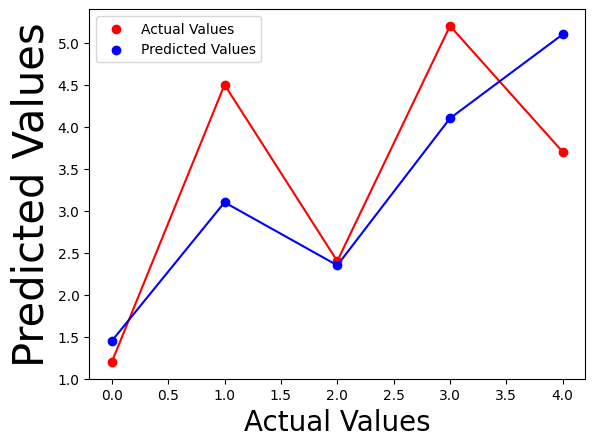

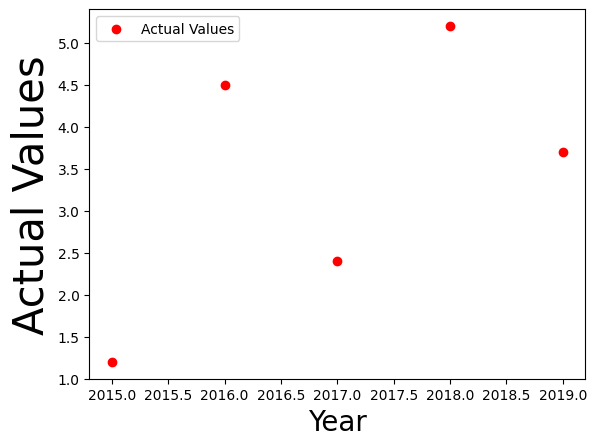

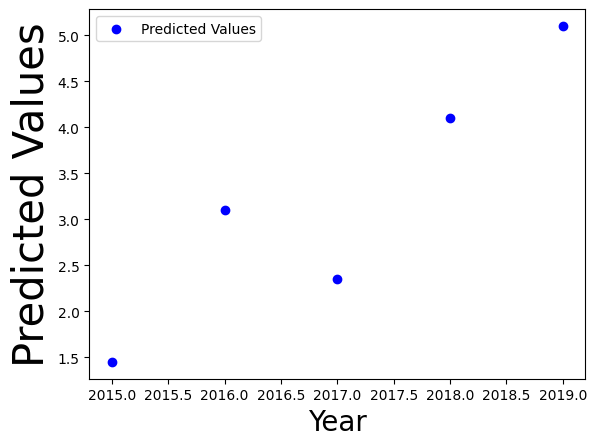

In [ ]:
import pandas as pd
actual_values = [1.20,4.50,2.40,5.20,3.70]
predicted_values = [1.45, 3.10, 2.35, 4.10, 5.10]
predicted_years = [2015, 2016, 2017, 2018, 2019]
df = pd.DataFrame({'Actual': actual_values,'Predicted': predicted_values,'Year': predicted_years})
print(df)

import matplotlib.pyplot as plt
X = df['Actual']
y = df['Predicted']
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=30)
plt.scatter(range(len(X)), X, color='red', label='Actual Values')
plt.plot(range(len(X)), X, color='red', linestyle='-')
plt.scatter(range(len(y)), y, color='blue', label='Predicted Values')
plt.plot(range(len(y)), y, color='blue', linestyle='-')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
X = df['Actual']
years = df['Year']
plt.xlabel('Year', fontsize=20)
plt.ylabel('Actual Values', fontsize=30)
plt.scatter(years, X, color='red',label='Actual Values')
plt.legend()
plt.show()

import matplotlib.pyplot as plt
X = df['Predicted']
years = df['Year']
plt.xlabel('Year', fontsize=20)
plt.ylabel('Predicted Values', fontsize=30)
plt.scatter(years, X, color='blue',label='Predicted Values')
plt.legend()
plt.show()